# This notebook uses the NIST webbook to parameterize the L-V curve. 
- We fit a polynomial, so for any given homogenization T we can get the pressure, and if we know P and T we can get density

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import DiadFit as pf

In [8]:
data=pd.read_excel('NistData_Critical.xlsx')
data.head()

,Temperature (C),Pressure (MPa),Quality (l+v),"Internal Energy (l+v, kJ/mol)","Enthalpy (l+v, kJ/mol)","Entropy (l+v, J/mol*K)","Density (l, g/ml)","Volume (l, ml/g)","Internal Energy (l, kJ/mol)","Enthalpy (l, kJ/mol)",...,"Volume (v, ml/g)","Internal Energy (v, kJ/mol)","Enthalpy (v, kJ/mol)","Entropy (v, J/mol*K)","Cv (v, J/mol*K)","Cp (v, J/mol*K)","Sound Spd. (v, m/s)","Joule-Thomson (v, K/MPa)","Viscosity (v, uPa*s)","Therm. Cond. (v, W/m*K)"
0,-56.558,0.51796,0.017962,3.7506,3.7993,24.222,1.1785,0.84856,3.5030,3.5223,...,72.670,17.286,18.943,94.138,27.691,39.992,222.78,26.174,10.892,0.011116
1,-56.480,0.51971,0.018017,3.7579,3.8068,24.256,1.1782,0.84876,3.5096,3.5290,...,72.436,17.287,18.944,94.118,27.701,40.013,222.79,26.149,10.896,0.011123
2,-56.403,0.52147,0.018073,3.7652,3.8142,24.289,1.1779,0.84896,3.5162,3.5357,...,72.204,17.288,18.945,94.098,27.71,40.034,222.8,26.123,10.899,0.01113
3,-56.325,0.52323,0.018129,3.7724,3.8217,24.323,1.1776,0.84917,3.5229,3.5424,...,71.972,17.289,18.946,94.078,27.72,40.055,222.81,26.097,10.903,0.011137
4,-56.248,0.52499,0.018186,3.7797,3.8292,24.357,1.1773,0.84937,3.5295,3.5491,...,71.741,17.290,18.948,94.058,27.729,40.076,222.81,26.072,10.907,0.011144


## Checking our method matches the NIST webbook

In [9]:
df_roomT_SW96=pf.calculate_CO2_density_homog_T_SW19962(T_h_C=data['Temperature (C)'])
df_roomT_SW96

,Bulk_gcm3,Liq_gcm3,Gas_gcm3,T_h_C,homog_to
0,NaN,1.178525,0.013761,-56.558,no input
1,NaN,1.178246,0.013806,-56.480,no input
2,NaN,1.177970,0.013850,-56.403,no input
3,NaN,1.177690,0.013895,-56.325,no input
4,NaN,1.177414,0.013939,-56.248,no input
...,...,...,...,...,...
1196,NaN,NaN,NaN,32.713,no input
1197,NaN,NaN,NaN,32.785,no input
1198,NaN,NaN,NaN,32.857,no input
1199,NaN,NaN,NaN,32.928,no input


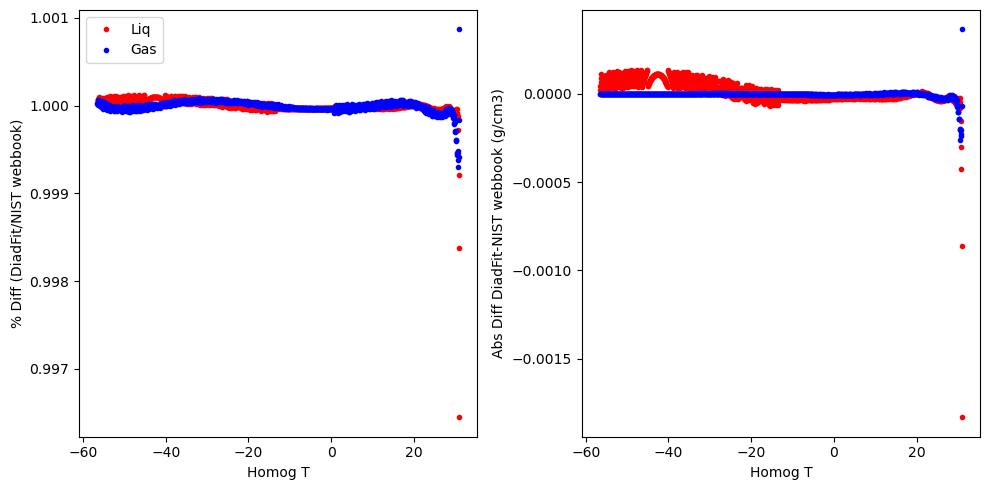

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(df_roomT_SW96['T_h_C'],
         df_roomT_SW96['Liq_gcm3']/data['Density (l, g/ml)'], '.r', label='Liq')
ax1.plot(df_roomT_SW96['T_h_C'],
         df_roomT_SW96['Gas_gcm3']/data['Density (v, g/ml)'], '.b', label='Gas')
ax1.set_xlabel('Homog T')
ax1.set_ylabel('% Diff (DiadFit/NIST webbook)')
ax1.legend()
ax2.plot(df_roomT_SW96['T_h_C'],
         df_roomT_SW96['Liq_gcm3']-data['Density (l, g/ml)'], '.r', label='Liq')
ax2.plot(df_roomT_SW96['T_h_C'],
         df_roomT_SW96['Gas_gcm3']-data['Density (v, g/ml)'], '.b', label='Gas')
ax2.set_xlabel('Homog T')
ax2.set_ylabel('Abs Diff DiadFit-NIST webbook (g/cm3)')
fig.tight_layout()
         

## Make the regression
- lets use a cubic spline

NameError: name 'Py' is not defined

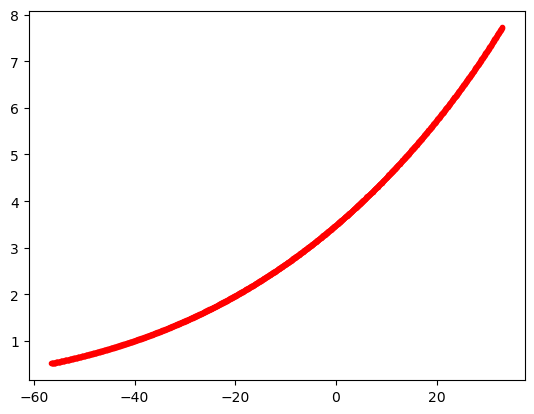

In [6]:
from scipy.interpolate import CubicSpline
import pandas as pd
spl=CubicSpline(data['Temperature (C)'], data['Pressure (MPa)'])
new_y=spl(data['Temperature (C)'])


plt.plot(data['Temperature (C)'], data['Pressure (MPa)'], '.r')
plt.plot(data['Temperature (C)'], Py, '.g', ms=1)
plt.plot(data['Temperature (C)'], new_y, '.k')
plt.xlim([0, 5])
plt.ylim([3, 4])

In [10]:
import pickle
with open('Phase_Boundary.pck', 'wb') as file_handle:
    pickle.dump(spl, file_handle)

In [11]:
with open('Phase_Boundary.pck', 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [13]:
df_roomT_SP94=pf.calculate_CO2_density_homog_T_SP1994(T_h_C=data['Temperature (C)'])
df_roomT_SP94

,Bulk_gcm3,Liq_gcm3,Gas_gcm3,T_h_C,homog_to
0,NaN,1.178525,0.013761,-56.558,no input
1,NaN,1.178246,0.013806,-56.480,no input
2,NaN,1.177970,0.013850,-56.403,no input
3,NaN,1.177690,0.013895,-56.325,no input
4,NaN,1.177414,0.013939,-56.248,no input
...,...,...,...,...,...
1196,NaN,NaN,NaN,32.713,no input
1197,NaN,NaN,NaN,32.785,no input
1198,NaN,NaN,NaN,32.857,no input
1199,NaN,NaN,NaN,32.928,no input


## How big are the discrepencies

Text(0.5, 0, 'Temp (C)')

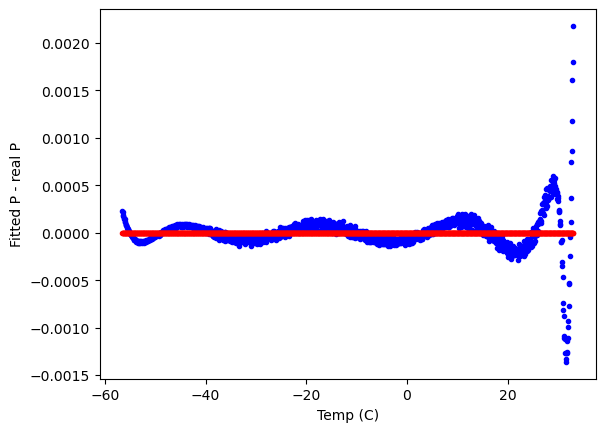

In [30]:
## Lets calculate it using our new function from eq 3.14 and 3.15

df_roomT_SP94=pf.calculate_CO2_density_homog_T_SP1994(T_h_C=data['Temperature (C)'])


plt.plot(
         data['Temperature (C)'], 
    Py-data['Pressure (MPa)'], 
         '.b')
plt.plot(
         data['Temperature (C)'], 
    new_y-data['Pressure (MPa)'], 
         '.r')
plt.ylabel('Fitted P - real P')
plt.xlabel('Temp (C)')

In [ ]:
plt.plot(

In [31]:
import CoolProp.CoolProp as cp
def calculate_density_homog_T(T_C):
    P_MPa=my_loaded_model(T_C)
    # Need to check if its greater than PCrit
    PCrit=7.3773
    TCrit=30.9782
    
    print('T='+str(T_C))
    print('P='+str(P_MPa))
    P_Pa=P_MPa*10**6
    T_K=T_C+273.15
    Phase=cp.PhaseSI('P', P_Pa, 'T', T_K,'CO2')
    print('Phase coolprop says='+str(Phase))

    if P_MPa<PCrit and T_C<TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|liquid', P_Pa, 'T', T_K, 'CO2')
 
    if P_MPa>PCrit and T_C<TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical_liquid', P_Pa, 'T', T_K, 'CO2')
    if P_MPa<PCrit and T_C>=TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical_gas', P_Pa, 'T', T_K, 'CO2')
    if P_MPa>PCrit and T_C>TCrit:
        Density_kgm3=cp.PropsSI('D', 'P|supercritical', P_Pa, 'T', T_K, 'CO2')
        
    Density_gcm3=Density_kgm3/1000
    
    return Density_gcm3
    

In [32]:
def loop_density_homog_T(T_C):
    Density=np.empty(len(T_C), dtype=float)
    if isinstance(T_C, pd.Series):
        T_C_np=np.array(T_C)
    for i in range(0, len(T_C)):
        Density[i]=calculate_density_homog_T(T_C[i])
    return Density
        

In [33]:
calculate_density_homog_T(T_C=27.8)

T=27.8
P=6.8605136050217865
Phase coolprop says=liquid


0.6598213829902363

In [22]:
0.63/0.66

0.9545454545454545

In [34]:
calculate_density_homog_T(T_C=-5.6)

T=-5.6
P=2.996023533572825
Phase coolprop says=gas


0.9595149936973022

In [23]:
0.9595/0.9288

1.0330534022394489

## Hectors was -5.6
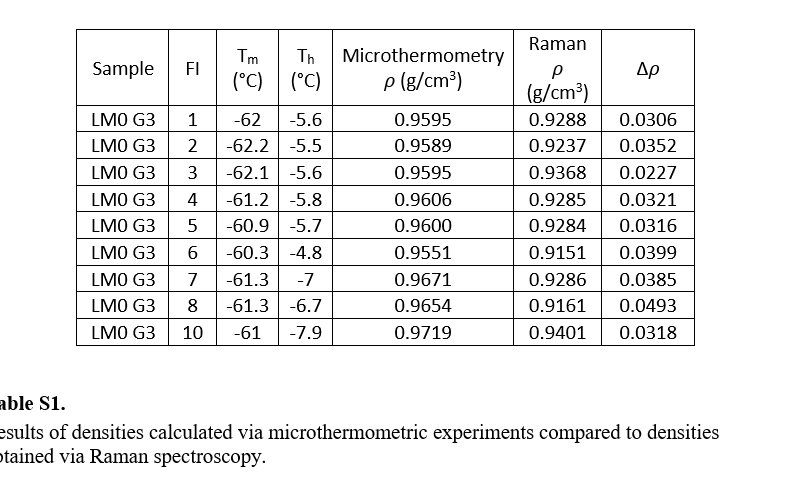!

In [6]:
#0.63-0.64g/cm3
import CoolProp.CoolProp as cp
Pressure_Pa=Pf_H/10**6
Temp_K=273.15-5.6     
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

NameError: name 'Pf_H' is not defined

In [10]:
x_C=27.8
Pf_C=Pf(x_C)
Pf_C

6.86306116880602

In [11]:
Pressure_Pa=Pf_C/10**6
Temp_K=273.15+x_C   
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

ValueError: Inputs in Brent [13491.667283,19487.963853] do not bracket the root.  Function values are [986285673400.996094,2148014658538.309570] : PropsSI("D","P|liquid",6.863061169e-06,"T",300.95,"CO2")

In [27]:
import CoolProp.CoolProp as cp
Pressure_Pa=Pf_H/10**6
Temp_K=273.15+0
Density_kgm3=cp.PropsSI('D', 'P|liquid', Pressure_Pa, 'T', Temp_K, 'CO2')
Density_gcm3=Density_kgm3/1000
Density_gcm3

0.8824365439750246

In [20]:
Density

5.925500270286429e-11

In [ ]:
Pressure=cp.PropsSI('P', 'D', 0.65*1000  , 'T', Temp_K, 'CO2')